In [84]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [152]:
nx = 81
L = 4.0
u_max = 1.0
rho_max = 10.0
rho_light = 10.0
x_light = 2.0
dx = L /(nx - 1)
sigma = 1.0
dt = sigma * dx / u_max
nt = 30

x = numpy.linspace(0.0, L, num=nx)



In [153]:
def velocity(rho, u_max, rho_max):
    u = u_max * (1 - rho / rho_max)
    return u

In [154]:
def flux(rho, u_max, rho_max):
    F = rho * velocity(rho, u_max, rho_max)
    return F

In [155]:

def ftbs(rho0, nt, dt, dx, u_max, rho_max):
    
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = flux(rho, u_max, rho_max)
        rho[1:] = rho[1:] - dt/dx *(F[1:] - F[:-1])
        rho_hist.append(rho.copy())
    return rho_hist



In [156]:
def ic(x, x_light, rho_light):
    rho0 = numpy.zeros_like(x)
    mask = numpy.where(x >= 0 & x < 2.0)
    rho[mask] = rho_light * x[mask] / x_light
    return rho0

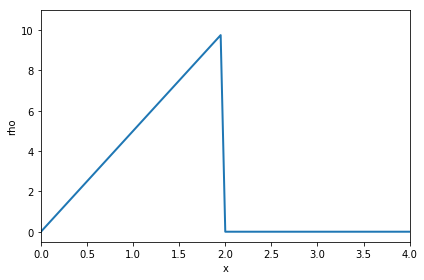

In [157]:
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('rho')

line = pyplot.plot(x, rho0, color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 11.0)
fig.tight_layout()

In [158]:
# compute the history of the traffic density
rho_hist = ftbs(rho0, nt, dt, dx, u_max, rho_max)

In [159]:
def plot(n, x, rho_hist):
    pyplot.figure()
    pyplot.title('Time Step: {}'.format(n))
    pyplot.xlabel('Road')
    pyplot.ylabel('Traffic density')
    pyplot.plot(x, rho_hist[n])
    pyplot.xlim(x[0], x[-1])
    pyplot.ylim(-0.5, 11.0)
    pyplot.show()

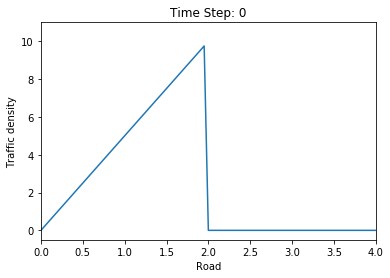

In [160]:
plot(0, x, rho_hist)

In [145]:
import ipywidgets

In [134]:
def interactive_plot(x, rho_hist):
    nt = len(rho_hist) - 1
    nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, description='Time step')
    w = ipywidgets.interactive(plot, n=nt_slider, x=ipywidgets.fixed(x), rho_hist=ipywidgets.fixed(rho_hist))
    return w

In [135]:
interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='Time step', max=30), Output()), _dom_classes=('widget-in…